### Author : Omkar Sanjay Jadhav
### Batch : GRIPOCT21

#### Task 1 : Prediction using Supervised Machine Learning
##### In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
###### This is a SLR task as it involves just two variables.
##### Python Libraries : Scikit Learn, Numpy Array, Pandas, Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split  

In [2]:
# Read the CSV file 

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


###### As the data is loaded now we need to undernstand the data properly to properly understand it we need to visualize the data

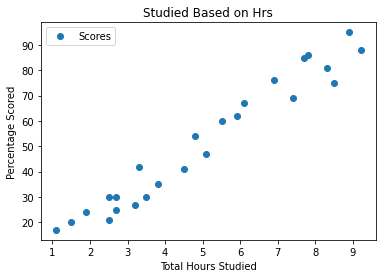

In [3]:
df.plot(x = 'Hours',y='Scores', style='o')
plt.title('Studied Based on Hrs')  
plt.xlabel('Total Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

#### From the above graph  we can see that the percentage score is affected by num of hrs studied

#### In next we need to divide data in two parts x,y 

In [4]:
# In x the values of Hours is stored 
# In y the values of percentage score is stored 

x = df.iloc[:, :1].values
y = df.iloc[:, -1].values 
print('Hours studied',x)
print('Percentage Score',y)

Hours studied [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Percentage Score [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


#### As our data now has been divided in two parts now we need to split it in training & test set

### We will use the inbuild library Scikit-Learn's to train & test set


In [5]:
#sklearn.model_selection.train_test_split
# (*arrays, test_size=None, train_size=None, random_state=None)
# x, y are arrays on which we need to divide training & testing 
# test_size represent the proportion of the dataset to include in the test split
# random_state Controls the shuffling applied to the data before applying the split. 

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

#### Now the data set is splitted into training and test set now  we can train out dataset

#### We are using the Linear Regression Algorithm to train our dataset

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


### As our training is completed we need to plot the line of regression

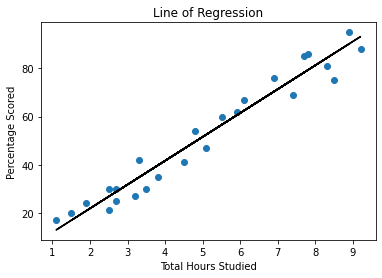

In [7]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='black')
plt.title('Line of Regression')  
plt.xlabel('Total Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

### Making Prediction

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [8]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual result to the Predicted Model result

In [9]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
# Estimating training and test score

print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


#### Plotting the Bar graph to depict the difference between the actual and predicted value

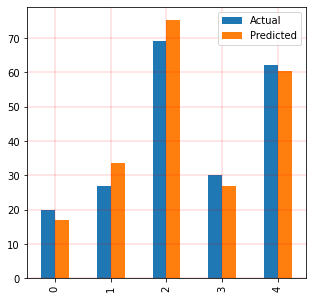

In [11]:
df1.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.2', color='red')
plt.grid(which='minor', linewidth='0.2', color='blue')
plt.show()

### Testing the model with our own data

In [12]:
hours = 9
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9
Predicted Score = 91.21406836721481


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356



 R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model

#### Conclusion

#### I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.


#### Thank You